# 深層学習前編（day1 day2）レポート

# ニューラルネットワークの全体像
---

## 確認テスト

### ディープラーニングは、結局何をやろうとしているか2行以内で述べよ。また、次の中のどの値の最適化が最終目的か。全て選べ。（1分）

- ①入力値$[X]$
- ②出力値$[Y]$
- ③重み$[W]$
- ④バイアス$[b]$
- ⑤総入力$[u]$
- ⑥中間層入力$[z]$
- ⑦学習率$[\rho]$

(解答)

入力に対して適切な出力を得るように重みとバイアスを学習すること

3と4

### 次のネットワークを紙にかけ。（5分）
- 入力層:2ノード1層
- 中間層:３ノード2層
- 出力層:1ノード1層

# 入力層から中間層
---

## 概要

入力層とは、何らかの数値をネットワークに流し込む最初の層で、各数値を受け取る場所をノードという。入力層に渡された数値$x$に重要度に合わせて重み$W$を与え、さらにバイアス$b$を加えて変換したもの(総入力: $u$)が中間層に伝えられる。
ニューラルネットワークはこの重みとバイアスを学習する。

$W = \begin{pmatrix}
w_1 \\
\vdots \\
w_4
\end{pmatrix}$
,
$x =\begin{pmatrix}
x_1 \\
\vdots \\
x_4
\end{pmatrix}$

$u = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b = Wx + b$

## 確認テスト

$u = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + + b = Wx + b$
### この数式をPythonで書け。（2分）

(解答)

```python
u = np.dot(x, W) + b
```

### 1-1のファイルから中間層の出力を定義しているソースを抜き出せ。（2分）

(解答)

```python
z = functions.relu(u)
z = functions.sigmoid(u)
z1 = functions.relu(u1)
z2 = functions.relu(u2)
```

# 活性化関数
---

## 概要

ニューラルネットワークにおいて、次の層への出力の大きさを決める**非線形**の関数のことをいう。
入力を重みとバイアスで変換(線形な処理)したもの(総入力)に対して、さらに活性化関数による非線形な処理を加えることで表現を豊かにすることができる。
活性化関数の種類として、中間層で利用されるものと出力層で利用されるものがあり、具体的には、ステップ関数、シグモイド関数、Relu関数など様々な種類がある。

## 確認テスト

### 線形と非線形の違いを図にかいて簡易に説明せよ。（2分）

(解答)

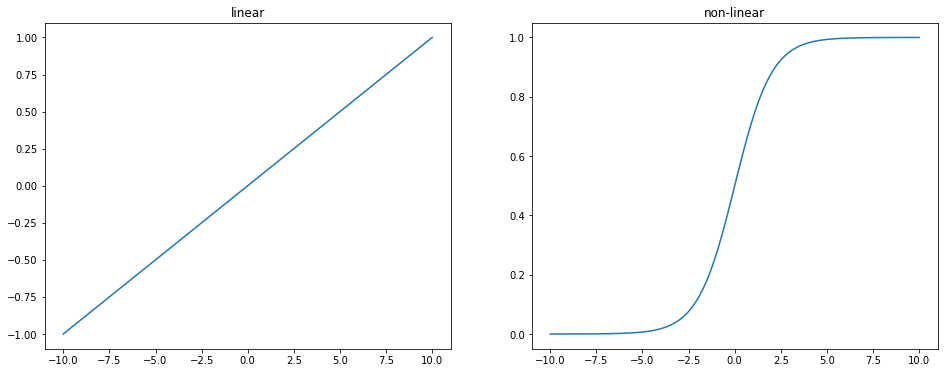

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
l = 0.1*x
nl = 1 / (1 + np.exp(-x))

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax1.plot(x, l)
ax1.set_title("linear")
ax2 = fig.add_subplot(122)
ax2.plot(x, nl)
ax2.set_title("non-linear")
plt.show()

線形な関数は、
- 加法性: $f(x + y) = f(x) + f(y)$
- 斉次性: $f(kx) = k\cdot f(x) $

を満たす。

一方、非線形関数はこれらを満たさない。

$z = f(u)$

### 配布されたソースコードより該当する箇所を抜き出せ。（3分）

(解答)

```python
z = functions.sigmoid(u)
```

## 実装演習

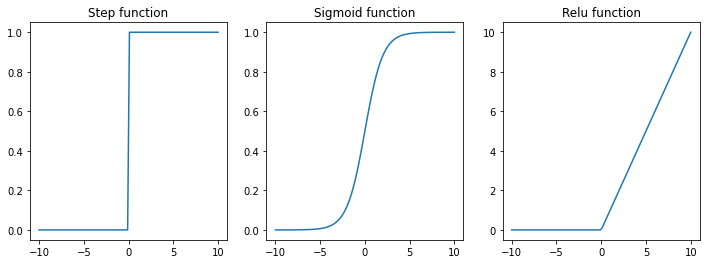

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# ステップ関数（閾値0）
def step_function(x):
    return np.where( x > 0, 1, 0) 

# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# ReLU関数
def relu(x):
    return np.maximum(0, x)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.plot(x, step_function(x))
ax1.set_title("Step function")
ax2 = fig.add_subplot(132)
ax2.plot(x, sigmoid(x))
ax2.set_title("Sigmoid function")
ax3 = fig.add_subplot(133)
ax3.plot(x, relu(x))
ax3.set_title("Relu function")
plt.show()

# 出力層

## 概要

ネットワークの最後の層であり、最終的に所望される形(分類問題であれば各クラスの確率など)で出力を行う。
出力層に渡された数値に**活性化関数**を適応し、出力される。この時最終的に所望される形になるような活性化関数を使用することが重要である(分類問題ならシグモイド関数またはソフトマックス関数、回帰問題なら恒等関数など)。
活性化関数によって変換された値は適切な**誤差関数**(分類問題なら交差エントロピー誤差、回帰問題なら平均二乗誤差など)に渡され、正解データとの誤差が算出される。
ニューラルネットワークでは、この誤差が小さくなるように重みとバイアスが調整される。

## 確認テスト

$E_n(w) = \frac{1}{2}\sum_{j=1}^{J}(y_j - d_j)^2 = \frac{1}{2}||(y - d)||^2$

### ・なぜ、引き算でなく二乗するか述べよ
### ・下式の1/2はどういう意味を持つか述べよ（2分）

(解答)

和をとっているため負の値を正にする必要があるから

微分した際に出てくる2を消去するため


$f(i, u) = \frac{e^{u_i}}{\sum_{k=1}^{K}e^{u_k}}$
### ①~③の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。（5分）

(解答)

```python
def softmax(x):    　　　　# ①関数の宣言
    if x.ndim == 2:  # 次元数が2のとき
        x = x.T      # 転置してsoftmaxで正規化したい要素がある次元をshape[0]に配置
        x = x - np.max(x, axis=0) #オーバーフロー対策
        y = np.exp(x) /np.sum(np.exp(x), axis=0) # ②、③shape[0]方向にソフトマックスを適応
        return y.T   # 元の形状に戻して結果を出力
    x = x - np.max(x) #オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x) # ②、③ソフトマックスを適応して、出力
```


$E_n(w) = -\sum_{i=1}^{I}d_i\log y_i$
### ①~②の数式に該当するソースコードを示し、一行づつ処理の説明をせよ。（5分）

(解答)

```python
def cross_entropy_error(d, y):      # ①関数の宣言
    if y.ndim == 1:                 # 出力の次元数が1のとき
        d = d.reshape(1, d.size)    # 教師データの要素を1つの次元内に並べる
        y = y.reshape(1, y.size)    # 出力の要素を1つの次元内に並べる
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:            # 教師データと出力の要素数が等しいとき
        d = d.argmax(axis=1)        # 教師データの要素の最大値があるインデックス(正解ラベルの位置)を取得
        batch_size = y.shape[0]     # 出力数を取得
        return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size # ②交差エントロピーを計算して出力
```


## 実装演習

In [3]:
import numpy as np
from common import functions

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(vec.shape))
    print("")

In [4]:
# 順伝播（単層・単ユニット）

# 重み
W = np.array([[0.1], [0.2]])

## 試してみよう_配列の初期化
#W = np.zeros(2)
#W = np.ones(2)
#W = np.random.rand(2)
#W = np.random.randint(5, size=(2))

print_vec("重み", W)


# バイアス
b = np.array(0.5)

## 試してみよう_数値の初期化
#b = np.random.rand() # 0~1のランダム数値
#b = np.random.rand() * 10 -5  # -5~5のランダム数値

print_vec("バイアス", b)

# 入力値
x = np.array([2, 3])
print_vec("入力", x)


# 総入力
u = np.dot(x, W) + b
print_vec("総入力", u)

# 中間層出力
z = functions.relu(u)
print_vec("中間層出力", z)


*** 重み ***
[[0.1]
 [0.2]]
shape: (2, 1)

*** バイアス ***
0.5
shape: ()

*** 入力 ***
[2 3]
shape: (2,)

*** 総入力 ***
[1.3]
shape: (1,)

*** 中間層出力 ***
[1.3]
shape: (1,)



In [5]:
# 順伝播（単層・複数ユニット）

# 重み
W = np.array([
    [0.1, 0.2, 0.3,0], 
    [0.2, 0.3, 0.4, 0.5], 
    [0.3, 0.4, 0.5, 1],
])

## 試してみよう_配列の初期化
#W = np.zeros((4,3))
#W = np.ones((4,3))
#W = np.random.rand(4,3)
#W = np.random.randint(5, size=(4,3))

print_vec("重み", W)

# バイアス
b = np.array([0.1, 0.2, 0.3])
print_vec("バイアス", b)

# 入力値
x = np.array([1.0, 5.0, 2.0, -1.0])
print_vec("入力", x)

#  総入力
u = np.dot(W, x) + b
print_vec("総入力", u)

# 中間層出力
z = functions.sigmoid(u)
print_vec("中間層出力", z)

*** 重み ***
[[0.1 0.2 0.3 0. ]
 [0.2 0.3 0.4 0.5]
 [0.3 0.4 0.5 1. ]]
shape: (3, 4)

*** バイアス ***
[0.1 0.2 0.3]
shape: (3,)

*** 入力 ***
[ 1.  5.  2. -1.]
shape: (4,)

*** 総入力 ***
[1.8 2.2 2.6]
shape: (3,)

*** 中間層出力 ***
[0.85814894 0.90024951 0.93086158]
shape: (3,)



In [6]:
# 順伝播（3層・複数ユニット）

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")
    network = {}
    
    input_layer_size = 3
    hidden_layer_size_1=10
    hidden_layer_size_2=5
    output_layer_size = 4
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size_1)
    network['W2'] = np.random.rand(hidden_layer_size_1,hidden_layer_size_2)
    network['W3'] = np.random.rand(hidden_layer_size_2,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size_1)
    network['b2'] =  np.random.rand(hidden_layer_size_2)
    network['b3'] =  np.random.rand(output_layer_size)

    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("重み3", network['W3'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )
    print_vec("バイアス3", network['b3'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")

    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    
    # 1層の総出力
    z1 = functions.relu(u1)
    
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 2層の総出力
    z2 = functions.relu(u2)

    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    
    # 出力層の総出力
    y = u3
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("中間層出力2", z2)
    print_vec("総入力2", u2)
    print_vec("出力", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1, z2

# 入力値
x = np.array([1., 2., 4.])
print_vec("入力", x)

# ネットワークの初期化
network =  init_network()

y, z1, z2 = forward(network, x)

*** 入力 ***
[1. 2. 4.]
shape: (3,)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.5887332  0.00772797 0.93861707 0.70885739 0.49487666 0.91929772
  0.37933803 0.80866281 0.16309601 0.56766097]
 [0.37173826 0.40834497 0.23853065 0.55664186 0.47250124 0.86707991
  0.87288994 0.66865435 0.51881918 0.06678976]
 [0.76726848 0.77934545 0.6980026  0.98171296 0.67509432 0.30254045
  0.05564474 0.93515334 0.79467779 0.7207022 ]]
shape: (3, 10)

*** 重み2 ***
[[0.71697369 0.93262357 0.12171378 0.88135346 0.79794289]
 [0.80380453 0.56618257 0.11432756 0.25972766 0.22809258]
 [0.10227547 0.39074967 0.52915547 0.03381358 0.5455578 ]
 [0.0816529  0.24727655 0.58014764 0.0836713  0.08622246]
 [0.33479603 0.70707837 0.80238356 0.69954954 0.71939712]
 [0.92910523 0.93617472 0.74213887 0.42863169 0.24848155]
 [0.48983106 0.39646017 0.34808351 0.77793073 0.44500363]
 [0.37090814 0.32835397 0.46910544 0.25988211 0.94752222]
 [0.26983652 0.25208749 0.7470083  0.17744207 0.3342895 ]
 [0.90387358 0.48869555 0.56285412

In [7]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-6 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    
    input_layer_size = 3
    hidden_layer_size=50
    output_layer_size = 6
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2.,  3.])

# 目標出力
d = np.array([0, 0, 0, 1, 0, 0])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("交差エントロピー誤差",  loss)

##### ネットワークの初期化 #####
*** 重み1 ***
[[7.08331323e-01 5.22828958e-01 1.97526023e-02 8.14347492e-01
  1.19529614e-01 8.78587808e-01 8.69321173e-01 6.34048824e-01
  3.98085963e-02 8.03486519e-01 4.83322869e-01 7.42055924e-04
  7.27387208e-01 8.70976452e-01 8.49202182e-01 6.68089198e-02
  6.09491422e-02 3.39033058e-01 5.38587891e-01 2.71459707e-01
  9.96682279e-03 7.38177486e-02 5.02288092e-01 8.37088162e-01
  9.91814657e-01 2.49583717e-01 8.12857001e-01 8.95886237e-01
  2.35934478e-01 6.69963712e-01 5.13544086e-02 7.08798728e-01
  6.00350308e-01 9.30385929e-01 5.71866246e-01 5.75520320e-01
  7.32339414e-01 3.39059571e-01 8.82428504e-01 9.02194695e-02
  6.03562884e-01 7.03591741e-01 8.53539275e-01 5.34178032e-02
  7.81662525e-01 6.79136160e-01 9.03025546e-01 8.74419622e-01
  7.56133303e-01 8.36412410e-01]
 [4.49863724e-01 3.40083201e-02 2.64671460e-01 2.84481880e-02
  6.25791685e-01 4.55246059e-01 8.15644627e-01 8.63765936e-02
  2.86283148e-01 8.62437160e-01 2.18248496e-01 3.87644391e-01
  

In [8]:
# 多クラス分類
# 2-3-4ネットワーク

# ！試してみよう_ノードの構成を 3-5-6 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成

    network = {}
    
    input_layer_size = 3
    hidden_layer_size=50
    output_layer_size = 6
    
    #試してみよう
    #_各パラメータのshapeを表示
    #_ネットワークの初期値ランダム生成
    network['W1'] = np.random.rand(input_layer_size, hidden_layer_size)
    network['W2'] = np.random.rand(hidden_layer_size,output_layer_size)

    network['b1'] =  np.random.rand(hidden_layer_size)
    network['b2'] =  np.random.rand(output_layer_size)
    
    print_vec("重み1", network['W1'] )
    print_vec("重み2", network['W2'] )
    print_vec("バイアス1", network['b1'] )
    print_vec("バイアス2", network['b2'] )

    return network

# プロセスを作成
# x：入力値
def forward(network, x):
    
    print("##### 順伝播開始 #####")
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    # 1層の総入力
    u1 = np.dot(x, W1) + b1

    # 1層の総出力
    z1 = functions.relu(u1)

    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    
    # 出力値
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))
        
    return y, z1

## 事前データ
# 入力値
x = np.array([1., 2.,  3.])

# 目標出力
d = np.array([0, 0, 0, 1, 0, 0])

# ネットワークの初期化
network =  init_network()

# 出力
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("交差エントロピー誤差",  loss)

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.97077186 0.51215991 0.27637312 0.65769292 0.51059686 0.39914716
  0.35765755 0.61186337 0.97604399 0.03712313 0.01099716 0.69573738
  0.48316943 0.30109951 0.99515071 0.37899889 0.85186095 0.26321623
  0.77302555 0.52131274 0.45619152 0.95410149 0.44296719 0.72233819
  0.29602779 0.50643839 0.97406505 0.04782832 0.71949528 0.17609035
  0.52925382 0.20551697 0.04980832 0.84222427 0.35499734 0.92282411
  0.50362231 0.62289605 0.29768166 0.08742897 0.44831678 0.78910345
  0.43140259 0.25337898 0.85081424 0.42354185 0.25523498 0.00164665
  0.00583235 0.44147885]
 [0.63820824 0.41113364 0.75400611 0.46190199 0.93337101 0.95461025
  0.55247856 0.52008957 0.84991335 0.68032141 0.84724178 0.89405063
  0.15489271 0.37692397 0.18536484 0.29593647 0.23193414 0.27019596
  0.8165665  0.10966381 0.3622052  0.30422994 0.54755579 0.62073511
  0.196572   0.03270512 0.43870354 0.57435276 0.54178167 0.98480231
  0.26035557 0.00628846 0.81428574 0.36362128 0.40286692

In [9]:
# 2値分類
# 2-3-1ネットワーク

# ！試してみよう_ノードの構成を 5-10-20-1 に変更してみよう

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1],
        [0.1, 0.3, 0.5,0.1, 0.3, 0.5,0.1, 0.3, 0.5, 0.1]
    ])
    network['W2'] = np.random.rand(10, 20)
    network['W3'] = np.random.rand(20, 1)

    network['b1'] = np.random.rand(10)
    network['b2'] =np.random.rand(20)
    network['b3'] =np.random.rand(1)

    return network


# プロセスを作成
def forward(network, x):
    print("##### 順伝播開始 #####")
    
    W1, W2, W3 = network['W1'], network['W2'],network['W3']
    b1, b2, b3 = network['b1'], network['b2'],network['b3']

    # 隠れ層の総入力
    u1 = np.dot(x, W1) + b1
    # 隠れ層1の総出力
    z1 = functions.relu(u1)
    # 隠れ層２層への総入力
    u2 = np.dot(z1, W2) + b2
    # 隠れ層2の出力
    z2 = functions.relu(u2)
    
    u3 = np.dot(z2, W3) + b3
    z3 = functions.sigmoid(u3)
    y = z3    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 入力値
x = np.array([1., 2.,2.,4.,5.])

# 目標出力
d = np.array([1])
network =  init_network()
y, z1 = forward(network, x)
# 誤差
loss = functions.cross_entropy_error(d, y)

## 表示
print("\n##### 結果表示 #####")
print_vec("中間層出力", z1)
print_vec("出力", y)
print_vec("訓練データ", d)
print_vec("交差エントロピー誤差",  loss)

##### ネットワークの初期化 #####
##### 順伝播開始 #####
*** 総入力1 ***
[1.5177084  4.92280872 7.36789536 1.83717667 4.43157487 7.98003706
 1.52922147 4.3431908  7.71612683 1.58853463]
shape: (10,)

*** 中間層出力1 ***
[1.5177084  4.92280872 7.36789536 1.83717667 4.43157487 7.98003706
 1.52922147 4.3431908  7.71612683 1.58853463]
shape: (10,)

*** 総入力2 ***
[25.14546243 21.66721816 15.62161611 19.79013181 18.49276699 23.8405678
 22.93082798 30.85190598 24.01539724 22.48663887 23.10557033 25.60716137
 28.66302112 24.70820024 17.35393985 21.98435489 15.64359087 11.29798871
 21.38417181 25.54510702]
shape: (20,)

*** 出力1 ***
[1.]
shape: (1,)

出力合計: 1.0

##### 結果表示 #####
*** 中間層出力 ***
[1.5177084  4.92280872 7.36789536 1.83717667 4.43157487 7.98003706
 1.52922147 4.3431908  7.71612683 1.58853463]
shape: (10,)

*** 出力 ***
[1.]
shape: (1,)

*** 訓練データ ***
[1]
shape: (1,)

*** 交差エントロピー誤差 ***
-9.999999505838704e-08
shape: ()



# 勾配降下法
---

## 概要

ニューラルネットワークを学習させる方法のことで、今回の重み(バイアス)$w^{(t)}$に学習率$\epsilon$で調整した誤差の傾き$\nabla E$を適応させて次回の重み$w^{(t+1)}$を得る。
学習率が大きすぎた場合、最小値にたどり着かず発散してしまう。
学習率が小さすぎる場合、発散しないが、収束するまでに時間がかかってしまう。
データの与え方によって、(バッチ)勾配降下法・確率的勾配降下法・ミニバッチ勾配降下法がある。


$w^{(t+1)} = w^{(t)} - \epsilon \nabla E$

$\nabla E = \frac{\partial E}{\partial w} = \bigl[ \frac{\partial E}{\partial w_1} \cdots \frac{\partial E}{\partial w_M}\bigr]$

## 確認テスト

$w^{(t+1)} = w^{(t)} - \epsilon \nabla E$

$\nabla E = \frac{\partial E}{\partial w} = \bigl[ \frac{\partial E}{\partial w_1} \cdots \frac{\partial E}{\partial w_M}\bigr]$
### 該当するソースコードを探してみよう。

(解答)

```python
for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]
```

```python
grad = backward(x, d, z1, y)
```

### オンライン学習とは何か2行でまとめよ（2分）

(解答)

逐次取得したデータ1つずつを使った学習


$w^{(t+1)} = w^{(t)} - \epsilon \nabla E$
### この数式の意味を図に書いて説明せよ。（3分）

## 実装演習

In [10]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

##### 結果表示 #####


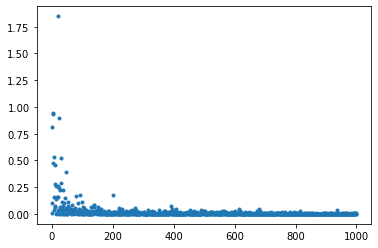

In [11]:
# サンプルとする関数
#yの値を予想するAI

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    
    ## 試してみよう
    #z1 = functions.sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = functions.d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    # print_vec("偏微分_重み1", grad["W1"])
    # print_vec("偏微分_重み2", grad["W2"])
    # print_vec("偏微分_バイアス1", grad["b1"])
    # print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    # data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.07

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

# 誤差逆伝播法
----

## 概要

算出された誤差を、出力層側から順に微分し、前の層前の層へと伝播し（微分の連鎖律を使って）、最小限の計算で（不要な再帰的計算を避けて）各パラメータでの微分値を解析的に計算する手法のことをいう。

## 確認テスト

### 誤差逆伝播法では不要な再帰的処理を避ける事が出来る。既に行った計算結果を保持しているソースコードを抽出せよ。（3分）

(解答)

```python
delta2 = functions.d_sigmoid_with_loss(d, y)


$\frac{\partial E}{\partial y} \frac{\partial y}{\partial u}$

$\frac{\partial E}{\partial y} \frac{\partial y}{\partial u} \frac{\partial u}{\partial w_{ji}^{(2)}}$

### 2つの空欄に該当するソースコードを探せ（3分）

(解答)

```python
delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
```

```python
grad['W2'] = np.dot(z1.T, delta2)
```

## 実装演習

In [12]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

In [13]:
# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])

    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])

    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad
    
# 訓練データ
x = np.array([[1.0, 5.0]])
# 目標出力
d = np.array([[0, 1]])
#  学習率
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

print("##### 結果表示 #####")    


print("##### 更新後パラメータ #####") 
print_vec("重み1", network['W1'])
print_vec("重み2", network['W2'])
print_vec("バイアス1", network['b1'])
print_vec("バイアス2", network['b2'])

##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]

*** バイアス1 ***
[0.1 0.2 0.3]

*** バイアス2 ***
[0.1 0.2]

##### 順伝播開始 #####
*** 総入力1 ***
[[1.2 2.5 3.8]]

*** 中間層出力1 ***
[[1.2 2.5 3.8]]

*** 総入力2 ***
[[1.86 4.21]]

*** 出力1 ***
[[0.08706577 0.91293423]]

出力合計: 0.9999999999999999

##### 誤差逆伝播開始 #####
*** 偏微分_dE/du2 ***
[[ 0.08706577 -0.08706577]]

*** 偏微分_dE/du2 ***
[[-0.02611973 -0.02611973 -0.02611973]]

*** 偏微分_重み1 ***
[[-0.02611973 -0.02611973 -0.02611973]
 [-0.13059866 -0.13059866 -0.13059866]]

*** 偏微分_重み2 ***
[[ 0.10447893 -0.10447893]
 [ 0.21766443 -0.21766443]
 [ 0.33084994 -0.33084994]]

*** 偏微分_バイアス1 ***
[-0.02611973 -0.02611973 -0.02611973]

*** 偏微分_バイアス2 ***
[ 0.08706577 -0.08706577]

##### 結果表示 #####
##### 更新後パラメータ #####
*** 重み1 ***
[[0.1002612  0.3002612  0.5002612 ]
 [0.20130599 0.40130599 0.60130599]]

*** 重み2 ***
[[0.09895521 0.40104479]
 [0.19782336 0.50217664]
 [0.2966915  0.6033085 ]]

*** バイアス1 ***
[0.1002

# *深層学習前編(day2)*
---

# 勾配消失問題
----

## 概要

誤差逆伝播法が下位層に進んでいくに連れて、勾配がどんどん緩やかになっていくため、勾配降下法による更新では下位層のパラメータはほとんど変わらず、訓練が進まなくなる問題のことをいう。
層を深くした場合や、中間層の活性化関数をシグモイド関数$f(x) = \frac{1}{1 + \exp^{(-x)}}$にした場合に生じることがわかっている。

解決策として
1. 活性化関数の選択

2. 重みの初期値設定

3. バッチ正規化

1について、活性化関数をRelu関数とすることで勾配消失問題が起きにくいことが知られている。

Relu関数:

$$
f(x) = \begin{cases}
    x & (x > 0) \\
    0 & (x \le 0)
  \end{cases}
$$

2について、重みの初期値としてXavierの初期値またはHeの初期値を使用することも有効な手段である。

Xavierの初期値(nは前の層のノード数):

$$\frac{1}{\sqrt{n}}$$

Heの初期値(nは前の層のノード数):

$$\sqrt{\frac{2}{n}}$$

3について、ミニバッチ単位で入力値のデータの偏りを抑制する手法であるが、これも有効である。

バッチ正規化手順:
1. $\mu_t = \sum_{i=1}^{N_t} x_{ni}$
2. $\sigma_{t}^2 = \frac{1}{N_t}\sum_{i=1}^{N_t} (x_{ni} - \mu_t)^2$
3. $\hat x_{ni} = \frac{x_{ni} - \mu_t}{\sqrt{\sigma_t^2 + \theta}}$
4. $y_{ni} = \gamma \hat x_{ni} + \beta$

$\mu_t$ : ミニバッチ$t$全体の平均

$\sigma_{t}^2$ : ミニバッチ$t$全体の標準偏差

$N_t$ : ミニバッチのインデックス

$\hat x_{ni}$ : 標準化した値

$\gamma$ : スケーリングパラメータ

$\beta$ : シフトパラメータ

$y_{ni}$ : バッチ正規化処理の出力

## 確認テスト

### 連鎖律の原理を使い、dz/dxを求めよ。（2分）
$$z = t^2$$
$$t = x +y$$


(解答)
\begin{align}
\frac{dz}{dx} &= \frac{dz}{dt} \cdot \frac{dt}{dx} \\
&= 2t \cdot 1 \\
&= 2(x + y)
\end{align}


### シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。（3分）
1. 0.15
2. 0.25
3. 0.35
4. 0.45

(解答)

シグモイド関数を$\sigma (x) = \frac{1}{1 + exp^{-x}}$としたとき、シグモシド関数を微分すると$\sigma(x) (1 - \sigma(x))$となり、$x = 0$のとき、$\sigma(0) = 0.5$より$0.25$で、2

### 重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。（1分）

(解答)

重みが全て均一な値で更新されてしまい、学習が進まない

### 一般的に考えられるバッチ正規化の効果を2点挙げよ。（2分）

(解答)
- 過学習を抑制する
- 学習時間を短縮できる
- 初期値の設定に過敏にならなくて済む

## 例題チャレンジ

バッチアルゴリズムとミニバッチアルゴリズム

以下は特徴データdata_x、ラベルデータdata_tに対してミニバッチ学習を行うプログラムである。
(き)に当てはまるのはどれか。
```python
def train(data_x, data_t, batch_size):
    """
    data_x: training data (features)
    data_t: training data (labels)
    n_epoch: number of epochs
    batch_size: mini batch size
    """
    N = len(data_x)
    for epoch in range(n_epoch):
        shuffle_idx = np.random.permutation(N)
        for i in range(0, N, batch_size):
            i_end = i + batch_size
            batch_x, batch_t = data[i:i_end], data_t[i:i_end] # (き)
            _update(batch_x, batch_t)
```

## 実装演習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14
                : 10. 正答率(テスト) = 0.1009
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.0892
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.12
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.09
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.12
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.09
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.12
                : 110. 正答率(テスト) = 0.1028
Generation: 120. 正答率(トレーニング) = 0.1
                : 120. 正答率(テスト) = 0.1028
Generation: 130. 正答率(トレーニング) = 0.11
                : 130. 正答率(テスト) = 0.101
Generation

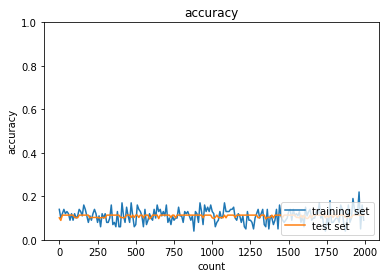

In [16]:
import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)

    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    last_d_f = functions.d_softmax_with_loss
    
    
    # 出力層でのデルタ
    delta3 = last_d_f(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.09
                : 20. 正答率(テスト) = 0.1012
Generation: 30. 正答率(トレーニング) = 0.08
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.12
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.19
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.18
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.15
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.07
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.12
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.09
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.11
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.07
                : 130. 正答率(テスト) = 0.1135
Generat

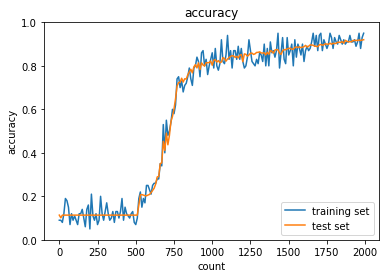

In [17]:
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    network['W1'] = wieght_init * np.random.randn(input_layer_size, hidden_layer_1_size)
    network['W2'] = wieght_init * np.random.randn(hidden_layer_1_size, hidden_layer_2_size)
    network['W3'] = wieght_init * np.random.randn(hidden_layer_2_size, output_layer_size)
            
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############

    hidden_f = functions.relu

    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.05
                : 10. 正答率(テスト) = 0.0892
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.12
Generation: 30. 正答率(トレーニング) = 0.22
                : 30. 正答率(テスト) = 0.1619
Generation: 40. 正答率(トレーニング) = 0.08
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.16
                : 50. 正答率(テスト) = 0.1684
Generation: 60. 正答率(トレーニング) = 0.22
                : 60. 正答率(テスト) = 0.2407
Generation: 70. 正答率(トレーニング) = 0.15
                : 70. 正答率(テスト) = 0.1239
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1191
Generation: 90. 正答率(トレーニング) = 0.18
                : 90. 正答率(テスト) = 0.1508
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1326
Generation: 110. 正答率(トレーニング) = 0.12
                : 110. 正答率(テスト) = 0.1146
Generation: 120. 正答率(トレーニング) = 0.19
                : 120. 正答率(テスト) = 0.1882
Generation: 130. 正答率(トレーニング) = 0.11
                : 130. 正答率(テスト) = 0.1146
Generatio

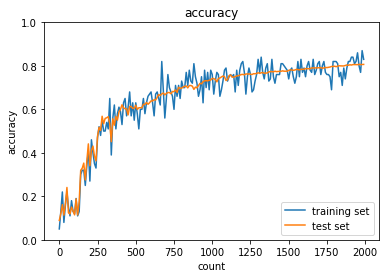

In [18]:
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20
#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 
    
    ###########  変更箇所  ##############
    
    # Xavierの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / (np.sqrt(input_layer_size))
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / (np.sqrt(hidden_layer_1_size))
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / (np.sqrt(hidden_layer_2_size))
    
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_f = functions.sigmoid
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    hidden_d_f = functions.d_sigmoid
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.36
                : 10. 正答率(テスト) = 0.3564
Generation: 20. 正答率(トレーニング) = 0.54
                : 20. 正答率(テスト) = 0.5582
Generation: 30. 正答率(トレーニング) = 0.73
                : 30. 正答率(テスト) = 0.7097
Generation: 40. 正答率(トレーニング) = 0.77
                : 40. 正答率(テスト) = 0.7848
Generation: 50. 正答率(トレーニング) = 0.74
                : 50. 正答率(テスト) = 0.7773
Generation: 60. 正答率(トレーニング) = 0.79
                : 60. 正答率(テスト) = 0.8016
Generation: 70. 正答率(トレーニング) = 0.83
                : 70. 正答率(テスト) = 0.8357
Generation: 80. 正答率(トレーニング) = 0.86
                : 80. 正答率(テスト) = 0.841
Generation: 90. 正答率(トレーニング) = 0.84
                : 90. 正答率(テスト) = 0.8524
Generation: 100. 正答率(トレーニング) = 0.88
                : 100. 正答率(テスト) = 0.8656
Generation: 110. 正答率(トレーニング) = 0.88
                : 110. 正答率(テスト) = 0.8737
Generation: 120. 正答率(トレーニング) = 0.92
                : 120. 正答率(テスト) = 0.869
Generation: 130. 正答率(トレーニング) = 0.89
                : 130. 正答率(テスト) = 0.8863
Generatio

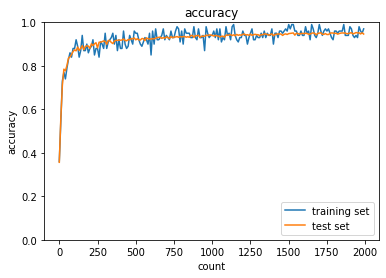

In [19]:
import numpy as np
from data.mnist import load_mnist
from PIL import Image
import pickle
from common import functions
import matplotlib.pyplot as plt

# mnistをロード
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = len(x_train)

print("データ読み込み完了")

# 重み初期値補正係数
wieght_init = 0.01
#入力層サイズ
input_layer_size = 784
#中間層サイズ
hidden_layer_1_size = 40
hidden_layer_2_size = 20

#出力層サイズ
output_layer_size = 10
# 繰り返し数
iters_num = 2000
# ミニバッチサイズ
batch_size = 100
# 学習率
learning_rate = 0.1
# 描写頻度
plot_interval=10

# 初期設定
def init_network():
    network = {} 

    ###########  変更箇所  ##############

    # Heの初期値
    network['W1'] = np.random.randn(input_layer_size, hidden_layer_1_size) / np.sqrt(input_layer_size) * np.sqrt(2)
    network['W2'] = np.random.randn(hidden_layer_1_size, hidden_layer_2_size) / np.sqrt(hidden_layer_1_size) * np.sqrt(2)
    network['W3'] = np.random.randn(hidden_layer_2_size, output_layer_size) / np.sqrt(hidden_layer_2_size) * np.sqrt(2)
        
    #################################
    
    network['b1'] = np.zeros(hidden_layer_1_size)
    network['b2'] = np.zeros(hidden_layer_2_size)
    network['b3'] = np.zeros(output_layer_size)

    return network

# 順伝播
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    ###########  変更箇所  ##############
    
    hidden_f = functions.relu
    
    #################################
    
    u1 =  np.dot(x, W1) + b1
    z1 = hidden_f(u1)
    u2 =  np.dot(z1, W2) + b2
    z2 = hidden_f(u2)
    u3 =  np.dot(z2, W3) + b3
    y = functions.softmax(u3)
 
    return z1, z2, y

# 誤差逆伝播
def backward(x, d, z1, z2, y):
    grad = {}
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    ###########  変更箇所  ##############
    
    hidden_d_f = functions.d_relu
    
    #################################
    
    # 出力層でのデルタ
    delta3 = functions.d_softmax_with_loss(d, y)
    # b3の勾配
    grad['b3'] = np.sum(delta3, axis=0)
    # W3の勾配
    grad['W3'] = np.dot(z2.T, delta3)
    # 2層でのデルタ
    delta2 = np.dot(delta3, W3.T) * hidden_d_f(z2)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 1層でのデルタ
    delta1 = np.dot(delta2, W2.T) * hidden_d_f(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)

    return grad

# パラメータの初期化
network = init_network()

accuracies_train = []
accuracies_test = []

# 正答率
def accuracy(x, d):
    z1, z2, y = forward(network, x)
    y = np.argmax(y, axis=1)
    if d.ndim != 1 : d = np.argmax(d, axis=1)
    accuracy = np.sum(y == d) / float(x.shape[0])
    return accuracy

for i in range(iters_num):
    # ランダムにバッチを取得    
    batch_mask = np.random.choice(train_size, batch_size)
    # ミニバッチに対応する教師訓練画像データを取得    
    x_batch = x_train[batch_mask]
    # ミニバッチに対応する訓練正解ラベルデータを取得する
    d_batch = d_train[batch_mask]


    
    z1, z2, y = forward(network, x_batch)
    grad = backward(x_batch, d_batch, z1, z2, y)

    if (i+1)%plot_interval==0:
        accr_test = accuracy(x_test, d_test)
        accuracies_test.append(accr_test)
        
        accr_train = accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network[key]  -= learning_rate * grad[key]


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 最適化手法
---

## 概要
勾配降下法で、学習率の値が大きい場合に、最適値にいつまでもたどり着かず発散してしまう、一方学習率の値が小さすぎる場合に、収束するまでに時間がかかってしまい、大域局所最適値に収束しづらくなるという問題があった。最適な学習率として初期の値を大きく、徐々に小さくしていく設定、パラメータ毎に学習率を可変させる設定が考えられる(学習率最適化手法)。
最適化(Optimization)の手法として
- モメンタム
- AdaGrad
- RMSprop
- Adam

がある。

モメンタムは、誤差をパラメータで微分したものと学習率の積を減算した後、現在の重みに前回の重みを減算した値と慣性$\mu$の積を加算するもので、
- 局所的最適解にはならず、大域的最適解となる
- 谷間についてから最も低い位置(最適値)にいくまでの時間が早い

といったメリットがある。

$$V_t = \mu V_{t-1} - \epsilon \nabla E$$
$$w^{(t + 1)} = w^{(t)} + V_t$$

AdaGradは、誤差をパラメータで微分したものと再定義した学習率の積を減算するもので、
- 勾配の緩やかな斜面に対して、最適値に近づける

というメリットがあるが、学習率が徐々に小さくなるため、鞍点問題を引き起こす事がある。

$$h_0 = \theta$$
$$h_t = h_{t-1} + (\nabla E)^2$$
$$w^{(t+1)} = w^{(t)} - \epsilon \frac{1}{\sqrt{h_t} + \theta} \nabla E$$

RMSpropは、AdaGradを改良したもので、
- 局所的最適解にはならず、大域的最適解となる
- ハイパーパラメータの調整が必要な場合が少ない

といったメリットがある。

$$h_0 = \theta$$
$$h_t = \alpha h_{t-1} + (1 - \alpha)(\nabla E)^2$$
$$w^{(t+1)} = w^{(t)} - \epsilon \frac{1}{\sqrt{h_t} + \theta} \nabla E$$

Adamは、
- モメンタムの過去の勾配の指数関数的減衰平均
- RMSPropの過去の勾配の2乗の指数関数的減衰平均

を有する最適化アルゴリズムであり、現在最も広く使用されている。モメンタムおよびRMSPropのメリットを併せ持っている。

$$V_t = \beta_1 h_{t-1} + (1 - \beta_1)\nabla E$$
$$h_t = \beta_2 V_{t-1} - (1 - \beta_2)(\nabla E)^2$$
$$w^{(t+1)} = w^{(t)} - \epsilon \frac{1}{\sqrt{h_t + \theta}} V_t$$

## 確認テスト

### モメンタム・AdaGrad・RMSPropの特徴をそれぞれ簡潔に説明せよ。（3分）

(解答)

- モメンタム:前回の勾配情報を用いて(移動平均を算出して)勾配を更新する

- AdaGrad:学習率を徐々に小さくする

- RMSprop:勾配の大きさに応じて学習率を調整する

## 実装演習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.1
                : 10. 正答率(テスト) = 0.0892
Generation: 20. 正答率(トレーニング) = 0.08
                : 20. 正答率(テスト) = 0.0892
Generation: 30. 正答率(トレーニング) = 0.16
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.14
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.08
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.12
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.19
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.11
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.11
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.15
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.09
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.1
                : 130. 正答率(テスト) = 0.1135
Generatio

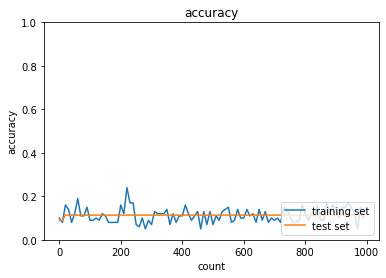

In [21]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet


# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================


network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
    
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))

        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.17
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.11
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.11
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.1
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.08
                : 50. 正答率(テスト) = 0.1009
Generation: 60. 正答率(トレーニング) = 0.15
                : 60. 正答率(テスト) = 0.101
Generation: 70. 正答率(トレーニング) = 0.14
                : 70. 正答率(テスト) = 0.101
Generation: 80. 正答率(トレーニング) = 0.09
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.06
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.12
                : 100. 正答率(テスト) = 0.101
Generation: 110. 正答率(トレーニング) = 0.12
                : 110. 正答率(テスト) = 0.101
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.101
Generation: 130. 正答率(トレーニング) = 0.1
                : 130. 正答率(テスト) = 0.1135
Generation: 14

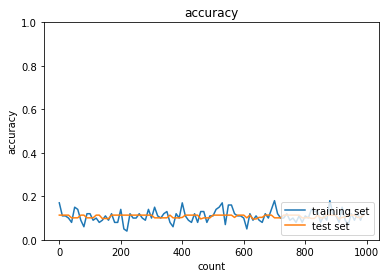

In [22]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
# 慣性
momentum = 0.9

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        v = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            v[key] = np.zeros_like(network.params[key])
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.05
                : 10. 正答率(テスト) = 0.0982
Generation: 20. 正答率(トレーニング) = 0.1
                : 20. 正答率(テスト) = 0.1135
Generation: 30. 正答率(トレーニング) = 0.05
                : 30. 正答率(テスト) = 0.1135
Generation: 40. 正答率(トレーニング) = 0.18
                : 40. 正答率(テスト) = 0.1135
Generation: 50. 正答率(トレーニング) = 0.11
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.12
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.12
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.15
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.06
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.11
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.14
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.09
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.14
                : 130. 正答率(テスト) = 0.1135
Generati

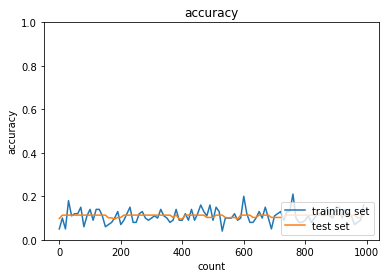

In [23]:
# AdaGradを作ってみよう
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
# iters_num = 500 # 処理を短縮

train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

# AdaGradでは不必要
# =============================

momentum = 0.9 

# =============================

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
            
        # 変更しよう  
        # ===========================================
        if i == 0:
            h[key] = np.zeros_like(network.params[key])        
        h[key] = momentum * h[key] - learning_rate * grad[key]
        network.params[key] += h[key]

        # ===========================================
        
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.15
                : 10. 正答率(テスト) = 0.1135
Generation: 20. 正答率(トレーニング) = 0.22
                : 20. 正答率(テスト) = 0.2235
Generation: 30. 正答率(トレーニング) = 0.21
                : 30. 正答率(テスト) = 0.2291
Generation: 40. 正答率(トレーニング) = 0.15
                : 40. 正答率(テスト) = 0.2236
Generation: 50. 正答率(トレーニング) = 0.36
                : 50. 正答率(テスト) = 0.2404
Generation: 60. 正答率(トレーニング) = 0.3
                : 60. 正答率(テスト) = 0.2929
Generation: 70. 正答率(トレーニング) = 0.32
                : 70. 正答率(テスト) = 0.3139
Generation: 80. 正答率(トレーニング) = 0.43
                : 80. 正答率(テスト) = 0.3323
Generation: 90. 正答率(トレーニング) = 0.42
                : 90. 正答率(テスト) = 0.3644
Generation: 100. 正答率(トレーニング) = 0.42
                : 100. 正答率(テスト) = 0.43
Generation: 110. 正答率(トレーニング) = 0.62
                : 110. 正答率(テスト) = 0.5236
Generation: 120. 正答率(トレーニング) = 0.61
                : 120. 正答率(テスト) = 0.4941
Generation: 130. 正答率(トレーニング) = 0.67
                : 130. 正答率(テスト) = 0.5876
Generation

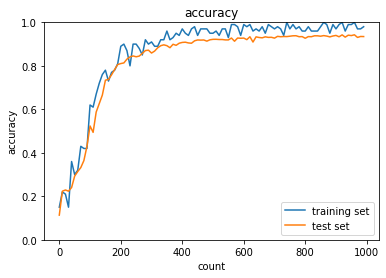

In [24]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
decay_rate = 0.99

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        h = {}
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            h[key] = np.zeros_like(network.params[key])
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)                
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.1028
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1076
Generation: 30. 正答率(トレーニング) = 0.12
                : 30. 正答率(テスト) = 0.1942
Generation: 40. 正答率(トレーニング) = 0.21
                : 40. 正答率(テスト) = 0.2364
Generation: 50. 正答率(トレーニング) = 0.39
                : 50. 正答率(テスト) = 0.3867
Generation: 60. 正答率(トレーニング) = 0.38
                : 60. 正答率(テスト) = 0.4203
Generation: 70. 正答率(トレーニング) = 0.42
                : 70. 正答率(テスト) = 0.417
Generation: 80. 正答率(トレーニング) = 0.5
                : 80. 正答率(テスト) = 0.4328
Generation: 90. 正答率(トレーニング) = 0.53
                : 90. 正答率(テスト) = 0.4927
Generation: 100. 正答率(トレーニング) = 0.54
                : 100. 正答率(テスト) = 0.5425
Generation: 110. 正答率(トレーニング) = 0.56
                : 110. 正答率(テスト) = 0.589
Generation: 120. 正答率(トレーニング) = 0.54
                : 120. 正答率(テスト) = 0.5948
Generation: 130. 正答率(トレーニング) = 0.6
                : 130. 正答率(テスト) = 0.6286
Generation:

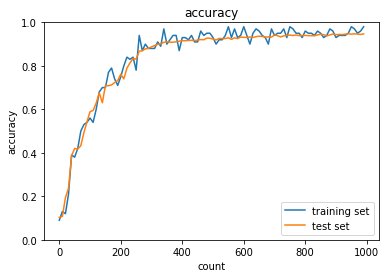

In [25]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

# batch_normalizationの設定 ================================
# use_batchnorm = True
use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01,
                       use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    if i == 0:
        m = {}
        v = {}
    learning_rate_t  = learning_rate * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        if i == 0:
            m[key] = np.zeros_like(network.params[key])
            v[key] = np.zeros_like(network.params[key])
            
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 過学習

## 概要

過学習(overfitting)は、機械学習の文面で、テスト誤差と訓練誤差とで学習曲線が乖離することによって生じる。
これは、特定の訓練サンプルに対して特化して学習している状態と言える。

原因として、
- パラメータの数が多い
- パラメータの値が適切でない
- ノードが多いetc...
が挙げられる。つまり、**ネットワークの自由度(層数、ノード数、パラメータの値etc...)が高い**ときに起こりやすい。

対策として、正則化とドロップアウトがある。

- 正則化(パラメータへの介入)

正則化は、ネットワークの自由度(層数、ノード数、パラメータの値etc...)を制約することで、過学習を抑制する。具体的には誤差関数に重みの大きさに応じたペナルティを加えることで、重みが大きくなりすぎないようにする。特に正則化の手法にL2ノルムを使用する方法をweight decay(荷重減衰)という。

- ドロップアウト(ノード数への介入)

ドロップアウトは、ランダムにノード(または、ノードへの接続)を削除して学習させる方法である。
データ量を変化させずに、異なるモデルを学習させていると解釈され、過学習を抑制する。

## 確認テスト

### 線形モデルの正則化手法、リッジ回帰の特徴として正しいものを選択しなさい。
1. ハイパーパラメータを大きな値に設定すると、全ての重みが限りなく0に近づく。
2. ハイパーパラメータを0に設定すると、非線形回帰となる。
3. バイアス項についても、正則化される。
4. リッジ回帰の場合、隠れ層に対して正則化項を加える。

(解答)
1

- 2. ハイパーパラメータを0にすると、通常の線形回帰になる
- 3. 通常バイアス項は正則化されない
- 4. 隠れ層ではなく、誤差の算出時(損失関数)に使用される

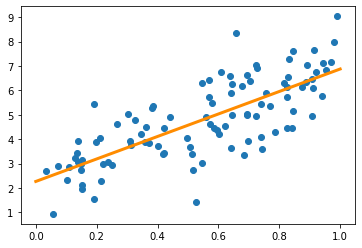

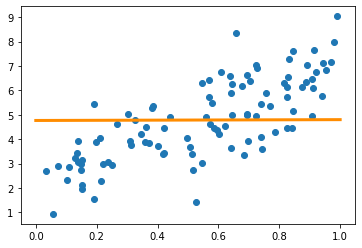

In [22]:
# 線形回帰モデルに正則化項を加え、正則化パラメータを極端に大きくさせた場合

import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# 擬似データ作成
x = np.random.rand(100)
y = 5.0 * x + 2.0 + np.random.randn(len(x))
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
t = np.linspace(0, 1, 100).reshape(-1, 1)

# 正則化パラメータが0の場合
model1 = Ridge(alpha=0)
model1.fit(x, y)
s1 = model1.predict(t)
plt.scatter(x, y)
plt.plot(t, s1, color='darkorange', marker='', linestyle='-', linewidth=3, markersize=6)
plt.show()
# 通常の線形回帰モデル

# 正則化パラメータが1000の場合
model2 = Ridge(alpha=1000)
model2.fit(x, y)
s2 = model2.predict(t)
plt.scatter(x, y)
plt.plot(t, s2, color='darkorange', marker='', linestyle='-', linewidth=3, markersize=6)
plt.show()
# 傾き(重み)はほぼ0(0ではない)となっているが、切片(バイアス)は正則化されない。

## 例題チャレンジ

以下はL2正則化を適用した場合にパラメータの更新を行うプログラムである。あるパラメータparamと正則化がない時にパラメータに伝播される誤差の勾配gradが与えられたとする。
最終的な勾配を計算する(え)に当てはまるのはどれか。ただし、rateはL2正則化の係数を表すとする。

```python
def ridge(param, grad, rate):
    """
    param: target parameter
    grad: gradients to param
    rate: ridge coefficient
    """
    
    grad += rate * param # (え)
```

以下はL1正則化(Lasso)を適用した場合に、パラメータの更新を行うプログラムである。あるパラメータparamと正則化がない時にパラメータに伝播される誤差の勾配gradが与えられたとする。
最終的な勾配を計算する(お)に当てはまるのはどれか。ただし、rateはL1正則化の係数を表すとする。

```python
def lasso(param, grad, rate):
    """
    param: target parameter
    grad: gradients to param
    rate: ridge coefficient
    """
    x = np.sign(param) # (お)
    grad += rate * x
```

以下は画像をランダムに切り取る処理を行うプログラムである。これは画像中の物体の位置を移動させるなどの意味がある。(か)に当てはまるのはどれか。
```python
def random_drop(image, crop_size):
    """
    image: (height, width, channel)
    crop_size: (crop_height, crop_width)
    
    hight >= crop_height,
    width >= crop_width
    """
    h, w = image.shape
    crop_h, crop_w = crop_size
    
    # 切り取る位置をランダムに決める
    top = np.random.randint(0, h - crop_h)
    left = np.random.randint(0, w - crop_w)
    bottom = top + crop_h
    right = left + crop_w
    
    image = [top:bottom, left:right, :] # (か)
    return image
```

## 実装演習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.10333333333333333
                : 10. 正答率(テスト) = 0.0835
Generation: 20. 正答率(トレーニング) = 0.19
                : 20. 正答率(テスト) = 0.1297
Generation: 30. 正答率(トレーニング) = 0.28
                : 30. 正答率(テスト) = 0.1956
Generation: 40. 正答率(トレーニング) = 0.33
                : 40. 正答率(テスト) = 0.2482
Generation: 50. 正答率(トレーニング) = 0.39666666666666667
                : 50. 正答率(テスト) = 0.2915
Generation: 60. 正答率(トレーニング) = 0.42
                : 60. 正答率(テスト) = 0.3215
Generation: 70. 正答率(トレーニング) = 0.4666666666666667
                : 70. 正答率(テスト) = 0.3535
Generation: 80. 正答率(トレーニング) = 0.5733333333333334
                : 80. 正答率(テスト) = 0.4
Generation: 90. 正答率(トレーニング) = 0.6366666666666667
                : 90. 正答率(テスト) = 0.4579
Generation: 100. 正答率(トレーニング) = 0.7133333333333334
                : 100. 正答率(テスト) = 0.498
Generation: 110. 正答率(トレーニング) = 0.7733333333333333
                : 110. 正答率(テスト) = 0.5548
Generation: 120. 正答率(トレーニング) = 0.8166666666666667
               

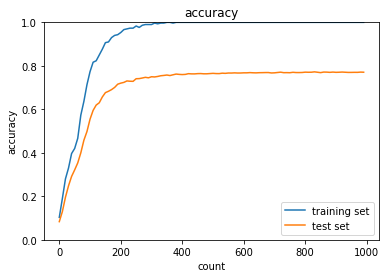

In [26]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.14333333333333334
                : 10. 正答率(テスト) = 0.1098
Generation: 20. 正答率(トレーニング) = 0.19
                : 20. 正答率(テスト) = 0.1446
Generation: 30. 正答率(トレーニング) = 0.23666666666666666
                : 30. 正答率(テスト) = 0.1707
Generation: 40. 正答率(トレーニング) = 0.26666666666666666
                : 40. 正答率(テスト) = 0.181
Generation: 50. 正答率(トレーニング) = 0.31
                : 50. 正答率(テスト) = 0.1858
Generation: 60. 正答率(トレーニング) = 0.3566666666666667
                : 60. 正答率(テスト) = 0.2152
Generation: 70. 正答率(トレーニング) = 0.42
                : 70. 正答率(テスト) = 0.2523
Generation: 80. 正答率(トレーニング) = 0.44333333333333336
                : 80. 正答率(テスト) = 0.2798
Generation: 90. 正答率(トレーニング) = 0.47333333333333333
                : 90. 正答率(テスト) = 0.3087
Generation: 100. 正答率(トレーニング) = 0.49666666666666665
                : 100. 正答率(テスト) = 0.3424
Generation: 110. 正答率(トレーニング) = 0.5133333333333333
                : 110. 正答率(テスト) = 0.363
Generation: 120. 正答率(トレーニング) = 0.526666666666

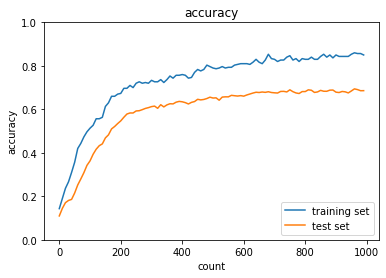

In [27]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5333333333333333
                : 10. 正答率(テスト) = 0.3988
Generation: 20. 正答率(トレーニング) = 0.6566666666666666
                : 20. 正答率(テスト) = 0.4873
Generation: 30. 正答率(トレーニング) = 0.48
                : 30. 正答率(テスト) = 0.3072
Generation: 40. 正答率(トレーニング) = 0.65
                : 40. 正答率(テスト) = 0.4739
Generation: 50. 正答率(トレーニング) = 0.8366666666666667
                : 50. 正答率(テスト) = 0.6053
Generation: 60. 正答率(トレーニング) = 0.91
                : 60. 正答率(テスト) = 0.6786
Generation: 70. 正答率(トレーニング) = 0.91
                : 70. 正答率(テスト) = 0.6947
Generation: 80. 正答率(トレーニング) = 0.67
                : 80. 正答率(テスト) = 0.565
Generation: 90. 正答率(トレーニング) = 0.55
                : 90. 正答率(テスト) = 0.4505
Generation: 100. 正答率(トレーニング) = 0.9266666666666666
                : 100. 正答率(テスト) = 0.7204
Generation: 110. 正答率(トレーニング) = 0.9666666666666667
                : 110. 正答率(テスト) = 0.7298
Generation: 120. 正答率(トレーニング) = 0.9366666666666666
                : 120. 正答率(テスト) = 0.7227
G

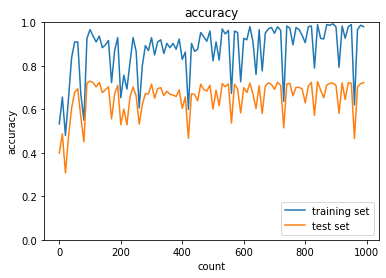

In [28]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

In [29]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09
                : 10. 正答率(テスト) = 0.0926
Generation: 20. 正答率(トレーニング) = 0.12
                : 20. 正答率(テスト) = 0.1006
Generation: 30. 正答率(トレーニング) = 0.12333333333333334
                : 30. 正答率(テスト) = 0.1028
Generation: 40. 正答率(トレーニング) = 0.13666666666666666
                : 40. 正答率(テスト) = 0.1065
Generation: 50. 正答率(トレーニング) = 0.14
                : 50. 正答率(テスト) = 0.1081
Generation: 60. 正答率(トレーニング) = 0.13666666666666666
                : 60. 正答率(テスト) = 0.1122
Generation: 70. 正答率(トレーニング) = 0.16
                : 70. 正答率(テスト) = 0.1308
Generation: 80. 正答率(トレーニング) = 0.17333333333333334
                : 80. 正答率(テスト) = 0.1417
Generation: 90. 正答率(トレーニング) = 0.18
                : 90. 正答率(テスト) = 0.1504
Generation: 100. 正答率(トレーニング) = 0.20333333333333334
                : 100. 正答率(テスト) = 0.1589
Generation: 110. 正答率(トレーニング) = 0.20666666666666667
                : 110. 正答率(テスト) = 0.1681
Generation: 120. 正答率(トレーニング) = 0.21666666666666667
                : 12

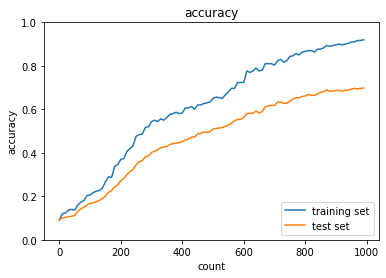

In [30]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

In [ ]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 畳み込みニューラルネットワーク(CNN)
---

## 概要
畳み込みニューラルネットワーク（Convolutional Neural Network:CNN）とは、「畳み込み層」と「プーリング層」を含む幾つかの特徴的な機能を持った層を有し、現在幅広い分野、特に画像認識の分野で優れた性能を発揮しているネットワークである。多層パーセプトロンと比較し、計算量が少ないため何段もの深い層にすることが可能である。基本構造として、入力層から、畳み込み層(含活性化関数)-プーリング層をいくつか繰り返した後、全結合層(含活性化関数)につないで、出力層となっている。

- 畳み込み層

畳み込み演算を行う層で、畳み込み演算は、入力データからフィルタと同サイズの領域を切り出してフィルタに通し、バイアスを加える操作のことをいう。このフィルタをストライド分だけスライドさせて順番に計算させることで、フィルタを適応した領域の特徴を抽出する。この計算過程で得られたデータは特徴マップと呼ばれる。
画像の例では、サイズ（縦と横）とチャンネル(RGB)の3次元のデータとなるが、全結合層では、これらを1次元のデータとして扱うためRGBの各チャンネル間の関連性が、学習に反映されないが、畳み込み層では、3次元データとして次元間のつながりを保ったまま、次に伝えることができるため、3次元の空間情報を学習できると解釈される。畳み込み層で使用されるパラメータは以下の通りである。

1. フィルタ(カーネル):入力データに適応させる重みのこと。チャネルは入力層と同じにする。

2. バイアス:フィルタを適応させた後に加算する。サイズは常に1 x 1

3. ストライド:フィルタを適用する位置の間隔のことで、大きくすることで出力サイズを小さくすることができる。

4. パディング:入力データの周囲に固定のデータ(0など)を埋める処理のことで、出力サイズを調整する役割がある。

- プーリング層

入力データのサイズ（画像の場合、縦と横）を小さくする処理を行う層で、領域の最大値を取得するMax poolingや平均値を取得するAverage poolingなどがある。特徴として、最大値(または平均値)をとるだけなので学習するパラメータがないことと、画像の場合、サイズ(縦と横)のみに適応するのでチャネル数は変わらない。領域で処理を行うので平行移動(ズレ)などでも影響を受けないロバスト性を与える役割を果たす。

- 畳み込み演算

入力データ(H, W, C)にFN個のフィルタ(FH, FW, C)をストライドS、パディングPで適応させた場合、
出力データ(OH, OW, OC)は、

$OH = \frac{H + 2 \cdot P - FH}{S} + 1$

$OW = \frac{W + 2 \cdot P - FW}{S} + 1$

$OC = FN$
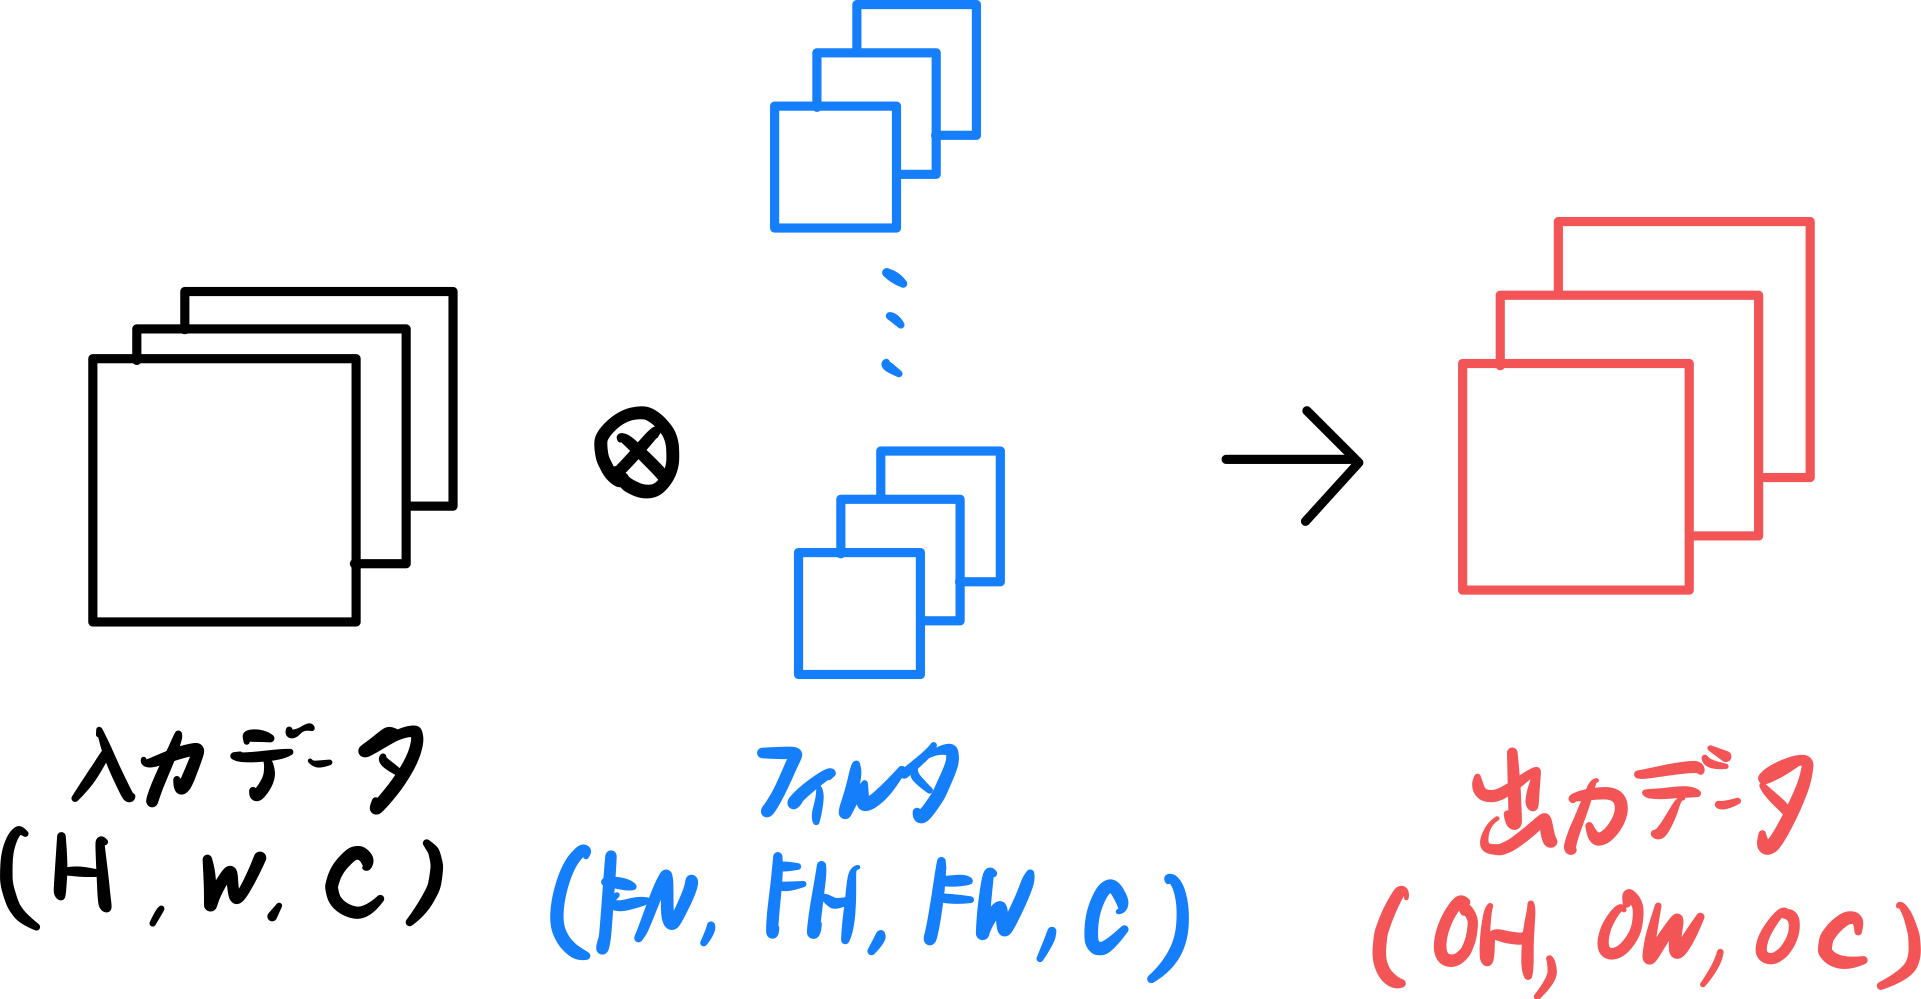

サイズ5×5の入力画像を、サイズ3×3のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドは2、パディングは1とする。（3分）## 確認テスト

### サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは1とする。（3分）

(解答)
$$H: (6 + (2 * 1) - 2) / 1 + 1 = 7$$
$$W: (6 + (2 * 1) - 2) / 1 + 1 = 7$$
7 x 7

## 実装演習

In [1]:
import pickle
import numpy as np
from collections import OrderedDict
from common import layers
from common import optimizer
from data.mnist import load_mnist
import matplotlib.pyplot as plt

# 画像データを２次元配列に変換
'''
input_data: 入力値
filter_h: フィルターの高さ
filter_w: フィルターの横幅
stride: ストライド
pad: パディング
'''
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_data.shape
    # 切り捨て除算
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3) # (N, C, filter_h, filter_w, out_h, out_w) -> (N, filter_w, out_h, out_w, C, filter_h)    
    
    col = col.reshape(N * out_h * out_w, -1)
    return col

In [2]:
# im2colの処理確認
input_data = np.random.rand(2, 1, 4, 4)*100//1 # number, channel, height, widthを表す
print('========== input_data ===========\n', input_data)
print('==============================')
filter_h = 3
filter_w = 3
stride = 1
pad = 0
col = im2col(input_data, filter_h=filter_h, filter_w=filter_w, stride=stride, pad=pad)
print('============= col ==============\n', col)
print('==============================')

========== input_data ===========
 [[[[91. 93. 20. 59.]
   [ 3.  6. 62. 25.]
   [56. 78. 89. 76.]
   [45. 48. 59. 55.]]]


 [[[71. 93.  5. 21.]
   [88. 58. 43. 29.]
   [65. 95. 59. 12.]
   [74. 70. 88.  5.]]]]
============= col ==============
 [[91. 93. 20.  3.  6. 62. 56. 78. 89.]
 [93. 20. 59.  6. 62. 25. 78. 89. 76.]
 [ 3.  6. 62. 56. 78. 89. 45. 48. 59.]
 [ 6. 62. 25. 78. 89. 76. 48. 59. 55.]
 [71. 93.  5. 88. 58. 43. 65. 95. 59.]
 [93.  5. 21. 58. 43. 29. 95. 59. 12.]
 [88. 58. 43. 65. 95. 59. 74. 70. 88.]
 [58. 43. 29. 95. 59. 12. 70. 88.  5.]]


In [3]:
# ２次元配列を画像データに変換
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    # N: number, C: channel, H: height, W: width
    N, C, H, W = input_shape
    # 切り捨て除算    
    out_h = (H + 2 * pad - filter_h)//stride + 1
    out_w = (W + 2 * pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2) # (N, filter_h, filter_w, out_h, out_w, C)

    img = np.zeros((N, C, H + 2 * pad + stride - 1, W + 2 * pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [4]:
class Convolution:
    # W: フィルター, b: バイアス
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # フィルター・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        # FN: filter_number, C: channel, FH: filter_height, FW: filter_width
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        # 出力値のheight, width
        out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)
        
        # xを行列に変換
        col = im2col(x, FH, FW, self.stride, self.pad)
        # フィルターをxに合わせた行列に変換
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        # 計算のために変えた形式を戻す
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        # dcolを画像データに変換
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


In [5]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # xを行列に変換
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        # プーリングのサイズに合わせてリサイズ
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        #maxプーリング
        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


In [6]:
class SimpleConvNet:
    # conv - relu - pool - affine - relu - affine - softmax
    def __init__(self, input_dim=(1, 28, 28), conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']        
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2 * filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size / 2) * (conv_output_size / 2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = layers.Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = layers.Relu()
        self.layers['Pool1'] = layers.Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = layers.Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = layers.Relu()
        self.layers['Affine2'] = layers.Affine(self.params['W3'], self.params['b3'])

        self.last_layer = layers.SoftmaxWithLoss()

    def predict(self, x):
        for key in self.layers.keys():
            x = self.layers[key].forward(x)
        return x
        
    def loss(self, x, d):
        y = self.predict(x)
        return self.last_layer.forward(y, d)

    def accuracy(self, x, d, batch_size=100):
        if d.ndim != 1 : d = np.argmax(d, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            td = d[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == td) 
        
        return acc / x.shape[0]

    def gradient(self, x, d):
        # forward
        self.loss(x, d)
        
        # backward
        dout = 1
        dout = self.last_layer.backward(dout)
        layers = list(self.layers.values())
        
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        grad['W1'], grad['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grad['W2'], grad['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grad['W3'], grad['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grad

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.4936
                : 10. 正答率(テスト) = 0.477
Generation: 20. 正答率(トレーニング) = 0.6298
                : 20. 正答率(テスト) = 0.594
Generation: 30. 正答率(トレーニング) = 0.7486
                : 30. 正答率(テスト) = 0.716
Generation: 40. 正答率(トレーニング) = 0.788
                : 40. 正答率(テスト) = 0.755
Generation: 50. 正答率(トレーニング) = 0.8304
                : 50. 正答率(テスト) = 0.802
Generation: 60. 正答率(トレーニング) = 0.8638
                : 60. 正答率(テスト) = 0.84
Generation: 70. 正答率(トレーニング) = 0.8574
                : 70. 正答率(テスト) = 0.826
Generation: 80. 正答率(トレーニング) = 0.8782
                : 80. 正答率(テスト) = 0.854
Generation: 90. 正答率(トレーニング) = 0.8848
                : 90. 正答率(テスト) = 0.862
Generation: 100. 正答率(トレーニング) = 0.8912
                : 100. 正答率(テスト) = 0.866
Generation: 110. 正答率(トレーニング) = 0.9024
                : 110. 正答率(テスト) = 0.882
Generation: 120. 正答率(トレーニング) = 0.9084
                : 120. 正答率(テスト) = 0.869
Generation: 130. 正答率(トレーニング) = 0.9062
                : 130. 正答率(テスト) = 0.

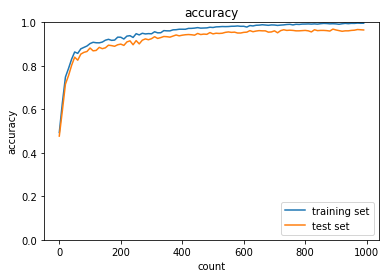

In [7]:
from common import optimizer

# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(flatten=False)

print("データ読み込み完了")

# 処理に時間のかかる場合はデータを削減 
x_train, d_train = x_train[:5000], d_train[:5000]
x_test, d_test = x_test[:1000], d_test[:1000]


network = SimpleConvNet(input_dim=(1,28,28), conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10



for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
    
    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)

    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

# 最新のCNN

## 概要

- AlexNet

初期のニューラルネットで、2012年に開催された大規模画像認識のコンペティションILSVRC(ImageNet Large Scale Visual Recognition Challenge)で使用され、圧倒的な成績で優勝し、画像認識分野におけるディープラーニングのブームのきっかけとなった。
5層の畳み込み層およびプーリング層と、それに続く3層の全結合層から構成される。過学習を防ぐ施策として、サイズ4096の全結合層の出力にドロップアウトを使用している。CNNでは多くの場合、最後の全結合層にドロップアウトを配置することが多い。

- ImageNet

100万枚を超える画像のデータセットのことで、入力画像サイズは224x224x3で各画像にはラベルが付与されている。ILSVRCのclassification部門ではこれらの画像を1000クラスに分類するタスクを競う。

- AlexNetアーキテクチャ
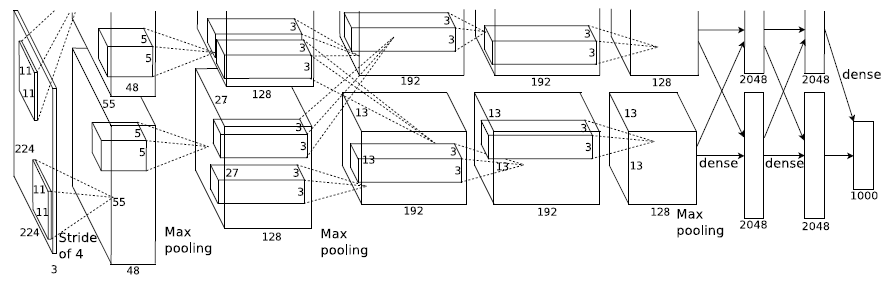

## 確認テスト

## サイズ5×5の入力画像を、サイズ3×3のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドは2、パディングは1とする。（3分）

(解答)

$OH = \frac{5 + 2 * 1 - 3}{2} + 1 = 3$

$OW = \frac{5 + 2 * 1 - 3}{2} + 1 = 3$

出力画像サイズ(3, 3)

ただし、チャネルはフィルタ数のため、1